In [1]:
import numpy as np
import sys
sys.path.append("..")
from logistic_regression import LogisticRegression

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
from train_test_split import train_test_split
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Ensure this line is executed before filtering:
# Filter out the Iris-Virginica class to focus on a binary classification task
X = X[y != 2]  # Assuming Iris-Virginica is encoded as '2'
y = y[y != 2]

# Now proceed with the rest of your preprocessing steps
# Split the dataset into training and test sets

iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(X, y, seed=345)
print(iris_X_train.shape)
print(iris_X_test.shape)
print(iris_y_train.shape)
print(iris_y_test.shape)
print(iris_y_train)

(75, 4)
(25, 4)
(75,)
(25,)
[1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0
 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0
 0]


In [4]:
lr_iris = LogisticRegression()
lr_iris.fit(iris_X_train, iris_y_train)

In [5]:
lr_pred_iris = lr_iris.predict(iris_X_test)
print(lr_pred_iris)

[1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0]


In [6]:
print(iris_y_test)
print(np.mean(lr_pred_iris == iris_y_test))

[1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0]
1.0


In [7]:
from cross_validation import k_folds_accuracy_score
lr_iris = LogisticRegression(n_iterations=100)
print(k_folds_accuracy_score(lr_iris, X, y, 10, 2108))

1.0


In [8]:
X, y = iris.data, iris.target
X = X[y != 0]  
y = y[y != 0]
print(k_folds_accuracy_score(lr_iris, X, y, 10, 2108))

0.5800000000000001


In [9]:
# Load the banknote dataset
banknote_data = np.genfromtxt('../datasets/data_banknote_authentication.txt', delimiter=',')

# Split into features and labels
X_bn = banknote_data[:, :-1]  # All rows, all columns except the last
y_bn = banknote_data[:, -1]   # All rows, only the last column

In [10]:
lr_bn_100 = LogisticRegression(n_iterations=100)
print(k_folds_accuracy_score(lr_bn_100, X_bn, y_bn, 10, 2108))
lr_bn_1000 = LogisticRegression(n_iterations=1000)
print(k_folds_accuracy_score(lr_bn_1000, X_bn, y_bn, 10, 2108))
lr_bn_10000 = LogisticRegression(n_iterations=10000)
print(k_folds_accuracy_score(lr_bn_10000, X_bn, y_bn, 10, 2108))

0.9344431024523446
0.9737961455652995
0.9883526755238143


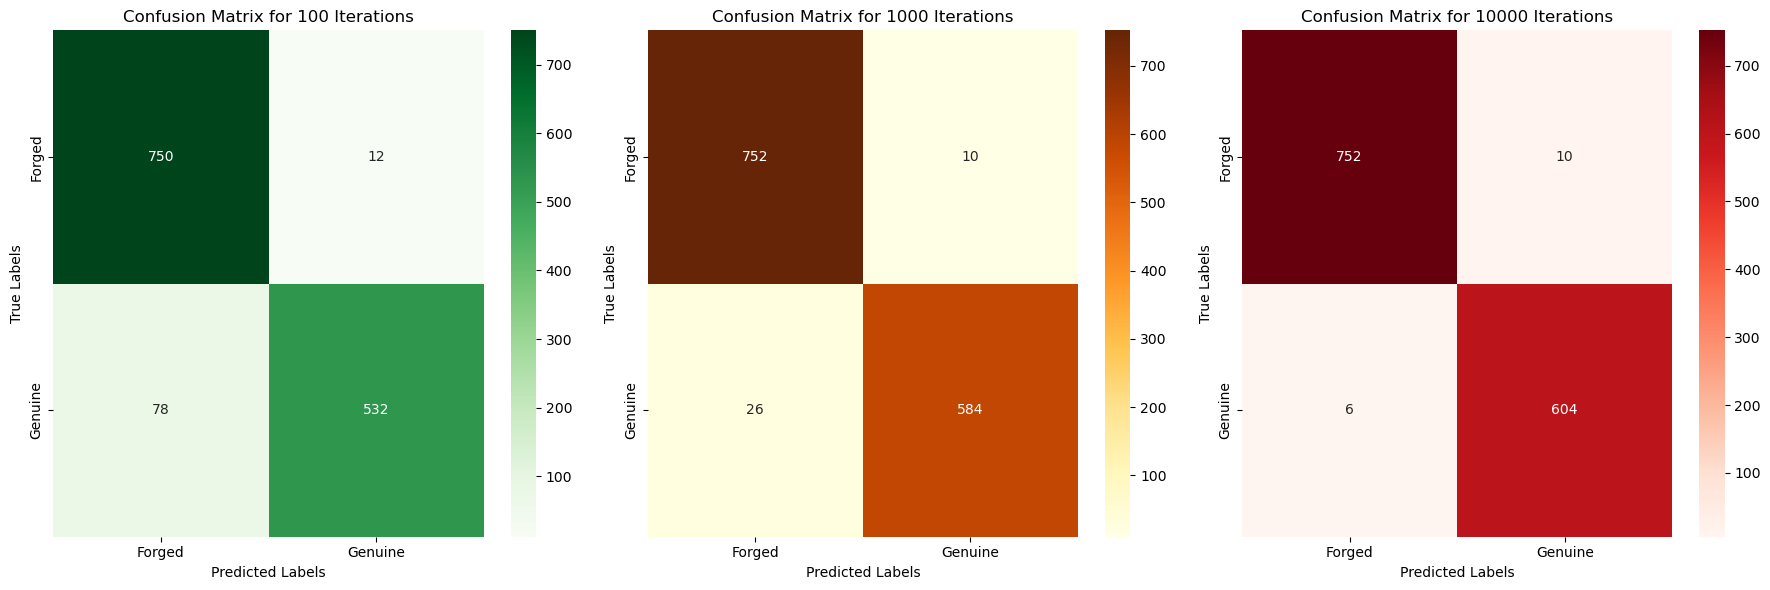

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from cross_validation import k_folds_predictions

# Assuming you have the k_folds_predictions function and models defined
models = [
    (LogisticRegression(n_iterations=100), "100 Iterations", "Greens"),
    (LogisticRegression(n_iterations=1000), "1000 Iterations", "YlOrBr"),  # Yellow-Orange-Brown palette for "yellow"
    (LogisticRegression(n_iterations=10000), "10000 Iterations", "Reds")
]

# Setup the matplotlib figure and axes for 1 row × 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, (model, label, cmap) in enumerate(models):
    y_true, y_pred = k_folds_predictions(model, X_bn, y_bn, 10, 2108)
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot each confusion matrix in its subplot with specified cmap
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=['Forged', 'Genuine'], yticklabels=['Forged', 'Genuine'], ax=axes[i])
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')
    axes[i].set_title(f'Confusion Matrix for {label}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()
